In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def load_single(path):
    with open(path) as f:
        lines = f.readlines()[5:]    
        v = np.zeros((len(lines), 2))
    
        for i in range(len(lines)):
            split = lines[i].split('\t')
            v[i,0] = float(split[0])
            v[i,1] = float(split[1])
    
        return v
    
def load_all(path):
    vals_list = []
    f_list = [f for f in os.listdir(path) if f.endswith('.txt')]
    
    if path.endswith(os.path.sep):
        new_path = path
    else:
        new_path = path+os.path.sep
    
    for f in f_list:
        vals_list.append(load_single(new_path+f))
        
    return vals_list
    
    
def plot_single(v):
    plt.plot(v[:,0],v[:,1])
    plt.plot([v[0,0], v[-1,0]], [2, 2])
    plt.show()
    
def plot_all(ref, v_list, factor = 1):
    plt.figure()
    plt.plot(ref[:,0],ref[:,1])
    plt.plot([ref[0,0], ref[-1,0]], [2, 2])
    for v in v_list:
        plt.plot(v[:,0],factor*v[:,1])
    plt.show()
    
def plot_multichannel(ref, v_list, factor = 1):
    plt.figure()
    plt.plot(ref[:,0],ref[:,1])
    plt.plot([ref[0,0], ref[-1,0]], [2, 2])
    for ch in v_list:
        for v in ch:
            plt.plot(v[:,0],factor*v[:,1])
    plt.show()
    
def average_last(v_list, window = 50):
    av = 0
    n = len(v_list)
    for v in v_list:
        av += np.mean(v[-window:,1]) / n
        
    return av

def get_delay(v_list, threshold = 2, factor = 1):
    ds = []
    
    for v in v_list:
        t = v[np.argmax(factor*v[:,1] >= threshold), 0]
        ds.append(t)
    
    return np.array(ds)
    

## Figure 2a: pulsing delay

In [6]:
# load data
cam = load_single('figure2a/C1camera00000.txt')
all_vals = load_all('figure2a/ch2')

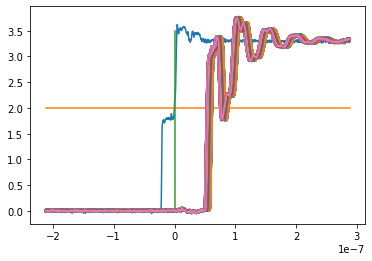

In [7]:
# show data with rescaling
factor = 3.3 / average_last(all_vals)
plot_all(cam, all_vals, factor)

In [42]:
# verify that the camera thresholding was at 2v
t0 = cam[np.argmax(cam[:,1] >= 2), 0]
t1 = cam[np.argmax(cam[:,1] >= 2)+1, 0]
print(t0, t1)

-8.3363e-11 3.16637e-10


In [41]:
# compute delay
delays = get_delay(all_vals, factor = factor)*1_000_000_000  # to ns
print(f'Delay {np.mean(delays)} +/- {np.std(delays)} ns')
print(f'Min delay {np.min(delays)}, Max delay {np.max(delays)}, Median {np.median(delays)}')

Delay 57.68204873046875 +/- 2.858019415516809 ns
Min delay 52.3588, Max delay 62.7144, Median 57.70635


In [55]:
# delay if we keep 2 V with the voltage division
delays_noscl = get_delay(all_vals)*1_000_000_000  # to ns
print(f'Delay {np.mean(delays_noscl)} +/- {np.std(delays_noscl)} ns')
print(f'Min delay {np.min(delays_noscl)}, Max delay {np.max(delays_noscl)}, Median {np.median(delays_noscl)}')

Delay 61.492986230468745 +/- 3.164640608824846 ns
Min delay 55.314299999999996, Max delay 67.4598, Median 61.377649999999996


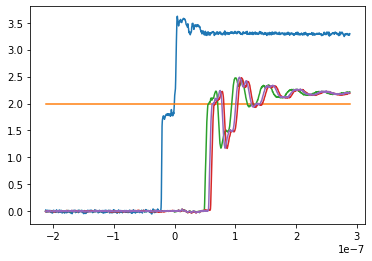

In [56]:
# get indices of min, max and median
i_s = [np.argmax(delays == np.min(delays)),
       np.argmax(delays == np.max(delays)),
       np.argmax(delays == np.median(delays))]

vals = [all_vals[i] for i in i_s]

plot_all(cam, vals)

## Figure 2b: pulse length accuracy

In [59]:
# load data
cam = load_single('figure2b/C1ch1_cam00000.txt')
ch2 = load_all('figure2b/ch2')
ch3 = load_all('figure2b/ch3')
ch4 = load_all('figure2b/ch4')

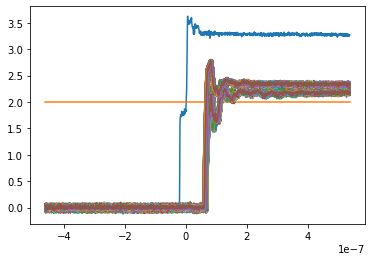

In [63]:
# show data
plot_multichannel(cam, [ch2, ch3, ch4])